<a href="https://colab.research.google.com/github/iagoit/data_projects/blob/main/an%C3%A1lise_de_produto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Produto

- A análise exploratória tem como objetivo apresentar a análise de um produto hipotético. 


## Pergunta a serem respondidas:

- Qual o mês que foi mais utilizado as funcionalidades?

- Quais os clientes que possuem mais acessos na plataforma?

- Qual é a média de acessos?

- Qual as funcionalidades mais utilizadas?

- Qual é o segmento com mais clientes?

- Qual é o MRR de cada segmento?

- Existe algum segmento que possui mais clientes inativos do que ativos?

In [198]:
# importar as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# importar os arquivos que serão utilizados
df_1 = pd.read_csv("daily_product_usage.csv")
df_2 = pd.read_csv("customers.csv")

## Análise de dados

Agora que ja importamos as bibliotecas necessarias e os arquivos que serão utilizados, é hora de conhecer nosso dataset. Primeiro iremos utilizar a função `head()` para visualizarmos as 5 primeiras entradas.

In [200]:
# conhecendo o dataframe daily_product_usage (df_1)
df_1.head()

,Date,CustomerId,FeatureId,DailyCount
0,2020-10-26,4085,Login,22
1,2020-11-26,4068,Login,32
2,2020-10-16,6758,Login,49
3,2020-01-13,3812,Login,25
4,2020-03-19,3814,Login,40


In [201]:
# conhecendo o dataframe customers (df_2)
df_2.head()

,CustomerId,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,6134,A,Ativo,Muito alto
1,1040,A,Ativo,Muito alto
2,48,A,Ativo,Muito alto
3,1088,A,Ativo,Muito alto
4,577,A,Ativo,Muito alto


## Dicionário de dados

`daily_product_usage.csv`:
- Date: Data em que o cliente utilizou a funcionalidade. 	
- CustomerId: Identificador do cliente. 	
- FeatureId: Identificador da funcionalidade. 	
- DailyCount: Contagem de usos daquela funcionalidade naquele dia pelo cliente.

`customers.csv`:
- CustomerId: Identificador do cliente.
- CustomerSegment: Segmento de mercado do cliente (A, B, C, etc.). 	
- CustomerStatusToday: Status de assinatura do cliente, quando observado hoje. Pode ser Ativo (ainda é um assinante na plataforma), ou Inativo (cancelou a assinatura em algum momento). 
- CustomerMrrRange: Faixa de MRR (monthly recurring revenue - receita recorrente mensal) do cliente (baixo, médio, alto, etc.).

Agora que já sabemos o conteúdo de cada *dataframe*, precisamos saber qual é o real tamanho de cada um deles.

In [202]:
# quantidade de linhas e colunas
print('Qtd Linhas:  ', df_1.shape[0])
print('Qtd Colunas: ', df_1.shape[1])

Qtd Linhas:   2988239
Qtd Colunas:  4


In [204]:
# quantidade de linhas e colunas
print('Qtd Linhas:  ', df_2.shape[0])
print('Qtd Colunas: ', df_2.shape[1])

Qtd Linhas:   8966
Qtd Colunas:  4


Agora que temos noção do tamanho de cada *dataframe*, entendemos que os `CustomersId` são os memos de ambos *dataframes*, porém o **daily_usage_product_csv**, tem a coluna data, ou seja, os os id estão se repetindo o que pode gerar valores ausentes ou outliers.

Então agora que já temos uma hipótese, vamos verificar mais a fundo os dados. Vejamos se o *dataframe* possui valores ausentes.

In [205]:
# quantidade de valores ausentes no df_1
(df_1.isnull().sum() / df_1.shape[0]).sort_values(ascending = False)

DailyCount    0.0
FeatureId     0.0
CustomerId    0.0
Date          0.0
dtype: float64

In [206]:
# quantidade de valores ausentes no df_2
(df_2.isnull().sum() / df_2.shape[0]).sort_values(ascending = False)

CustomerMrrRange       0.032121
CustomerStatusToday    0.000000
CustomerSegment        0.000000
CustomerId             0.000000
dtype: float64

Conseguimos identificar que o *dataframe* de **customers** possui 3% de valor ausente na váriavel CustomerMrrRange, o que não é tão relevante a ponto de afetar os dados, mas caso fosse necessário poderiamos utilizar o `median()`, para substituir os valores ausentes.

Agora precisamos verificar os tipos de cada coluna.

In [207]:
# verifica os tipos de cada variável do df_1
df_1.dtypes

Date          object
CustomerId     int64
FeatureId     object
DailyCount     int64
dtype: object

In [209]:
# verifica os tipos de cada variável do df_2
df_2.dtypes

CustomerId              int64
CustomerSegment        object
CustomerStatusToday    object
CustomerMrrRange       object
dtype: object

Identificamos que a coluna `Date` está como tipo objeto quando na verdade ela é do tipo DateTime. Então precismos transforma-la para conseguir utiliza-la da melhor forma.

In [208]:
# transformar a coluna Data de objeto para datetime
df_1.Date = pd.to_datetime(df_1.Date)

Agora que temos nossa data com o tipo correto é hora de verificar como estão as datas dentro do *dataframe*.

In [210]:
# verifica qual a data minima do dataset
df_1.Date.min()

Timestamp('2020-01-01 00:00:00')

In [211]:
# verifica qual a data maxima do dataset
df_1.Date.max()

Timestamp('2020-12-31 00:00:00')

Conseguimos identificar que é um *dataframe* que se trata apenas do ano de 2020. Agora iremos adicionar a coluna de ano e mês no *dataframe*.

In [213]:
# criando coluna de ano e mês
df_1['Year'] = df_1['Date'].dt.year
df_1['Month'] = df_1['Date'].dt.month
df_1.head()

,Date,CustomerId,FeatureId,DailyCount,Year,Month
0,2020-10-26,4085,Login,22,2020,10
1,2020-11-26,4068,Login,32,2020,11
2,2020-10-16,6758,Login,49,2020,10
3,2020-01-13,3812,Login,25,2020,1
4,2020-03-19,3814,Login,40,2020,3


Agora com as colunas já adicionadas podemos fazer analises anuais e mensais, caso fosse necessário poderiamos adicionar colunas para semana e dias da semana para uma análise mais profunda.

Agora é hora de responder as perguntas que foram levantadas no começo das análises.

### Q1. Qual o mês que foi mais utilizado as funcionalidades?

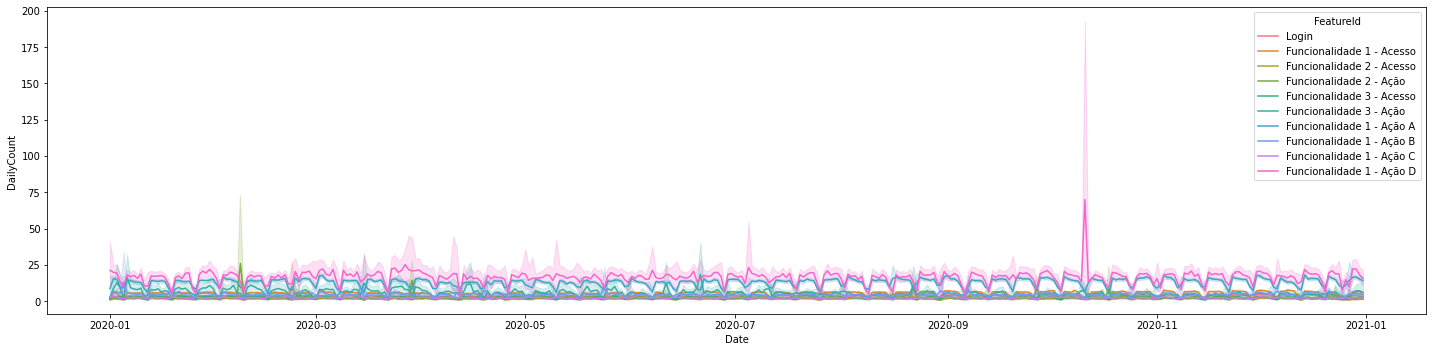

In [226]:
# copiando o dataset original e criando um novo index
acessos = df.copy()
acessos.set_index('FeatureId', inplace = True)
acessos = acessos.reset_index()

# criando a figura do matplotlib
fig, ax = plt.subplots(figsize=(20, 5))

# plotando gráfico de linhas
ax = sns.lineplot(x='Date', y='DailyCount', hue='FeatureId', data=acessos, palette='husl');
plt.tight_layout()

### Q2. Quais os clientes que possuem mais acessos na plataforma?

In [168]:
#verificar os 10 clientes com mais acesso na plataforma
print(df_1.CustomerId.value_counts()[0:10])

1830    2167
6014    1988
1819    1966
6257    1923
4821    1890
1040    1878
3814    1877
13      1811
7681    1791
3563    1786
Name: CustomerId, dtype: int64


Conseguimos identificar os 10 clientes com mais acessos na plataforma, o que seria possível fazer, era segmentar cada um desses clientes.

### Q3. Qual é a média de acessos?

In [117]:
# verifica a média de acessos
df_1.DailyCount.mean()

7.056723374535973

Como identificamos, a média de acessos diários são 7, porém tem cliente que não possui acesso ou possui 1 acesso diário o que acaba impactando nos demais.

### Q4. Qual as funcionalidades mais utilizadas?

In [160]:
# verifica qual a funcionalidade mais utilizada
df_1.FeatureId.value_counts()

Login                        986747
Funcionalidade 1 - Acesso    942094
Funcionalidade 1 - Ação A    557556
Funcionalidade 1 - Ação B    125455
Funcionalidade 1 - Ação D    124722
Funcionalidade 1 - Ação C     91240
Funcionalidade 3 - Acesso     47872
Funcionalidade 2 - Acesso     45250
Funcionalidade 3 - Ação       37898
Funcionalidade 2 - Ação       29405
Name: FeatureId, dtype: int64

Se tratando de funcionalidades, as mais utilizadas são: Funcionalidade 1 (Ação A), Funcionalidade 1 (Ação B), Funcionalidade 1 (Ação D), Funcionalidade 1 (Ação C), Funcionalidade 3 (Ação) e Funcionalidade 2 (Ação). 

### Q5. Qual é o segmento com mais clientes?

In [125]:
# verifica qual o segmento possui mais clientes
df_2.CustomerSegment.value_counts()

D         5101
E         1759
C         1699
B          336
A           50
Outros      21
Name: CustomerSegment, dtype: int64

Conseguimos identificar que o segmento que possui mais clientes é o segmento D, o que possibilita uma escala muito alta de clientes.

### Q6. Qual é o MRR de cada segmento?

In [162]:
# verifica a quantidade de MRR de cada segmento
df_2.groupby(['CustomerSegment']).CustomerMrrRange.value_counts()

CustomerSegment  CustomerMrrRange
A                Muito alto            46
                 Alto                   2
                 Médio                  2
B                Alto                 182
                 Médio                 98
                 Muito alto            40
                 Baixo                 10
                 Muito baixo            6
C                Médio                995
                 Baixo                359
                 Alto                 197
                 Muito baixo           74
                 Muito alto            14
D                Baixo               1983
                 Muito baixo         1845
                 Médio               1032
                 Alto                 162
                 Muito alto             3
E                Muito baixo          828
                 Baixo                494
                 Médio                255
                 Alto                  32
Outros           Médio                  9


Agora sabemos quantos clientes possuimos em cada segmento de acordo com o MRR, sendo os melhores segmentos para segmentação de público o D, C e E.

### Q7. Existe algum segmento que possui mais clientes inativos do que ativos?

In [225]:
# verifica o status de cliente de cada segmento
df_2.groupby(['CustomerSegment']).CustomerStatusToday.value_counts()

CustomerSegment  CustomerStatusToday
A                Ativo                    43
                 Inativo                   7
B                Ativo                   291
                 Inativo                  45
C                Ativo                   980
                 Inativo                 719
D                Ativo                  3919
                 Inativo                1182
E                Ativo                  1204
                 Inativo                 555
Outros           Ativo                    11
                 Inativo                  10
Name: CustomerStatusToday, dtype: int64

Nenhum segmento possui mais inativos do que ativos.

## Conclusão

- Bases de dados bem trabalhosas, mesmo tendo poucas variáveis dificulta a extração de insights.

- Não possui valores ausentes ou outliers com números significantes.

- Identificamos os 10 clientes com mais acessos na plataforma, a recomendação seria segmentar esses clientes de acordo com a regra de negócio e gerar leads de acordo com a segmentação.

- Conseguimos identificar as funcionalidades mais utilizadas e podemos verificar o porque está ação é tão utilizada e relacionar com a segmentação de cada cliente. Também seria interessante identificar onde o usuário está saindo da plataforma, com uma ferramenta como o `Hotjar`.

- Identificamos também a quantidade de clientes que possuimos em cada segmento de acordo com o MRR, os que estão com MRR muito baixo ou baixo, seria interessante oferecer uma oferta, já a quantidade de clientes médios está ótimo, tendo em vista que podemos escalar esse público e os clientes com MRR alto ou muito alto, devemos entender o motivo pelo qual eles possuem MRR e segmenta-los para atrair mais públicos semelhantes.


**Todas as conclusões foram baseadas em hipóteses e sem conhecimento da regra de negócio.**